In [139]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd

from bokeh.io import output_notebook
output_notebook()
from bokeh.models import ColumnDataSource, Span
from bokeh.plotting import figure, show, output_file

Loading BokehJS ...

In [140]:
customers = pd.read_csv('./data/customer_details.csv')
deliveries = pd.read_csv('./data/deliveries.csv')
colocations = pd.read_csv('./data/colocations.csv')


In [141]:
dataset = pd.read_csv('./data/level_readings.csv')

In [142]:
customers = customers.fillna("NOT_AVAILABLE")
customers.head(10)

,INST_ID,CNTRY_UN_COUNTRY_CODE,PROVINCE,PRD_ID,MAXIMUM_PRODUCT_CAPACITY,VESSEL_ID,MKT_SEGMENT,ISIC_CODE,ISIC_DESCRIPTION
0,216705,BR,PB,LOX,2195,BR-216705,Healthcare,8610,Hospital activities
1,216706,BR,SP,LOX,13075,BR-216706,Chemistry & Energy,3822,Treatment and disposal of hazardous wast
2,216721,BR,SP,LOX,3567,BR-216721,Manufacturing Industries,2910,Manufacture of motor vehicles
3,216729,BR,SP,LAR,13852,BR-216729,Metals & Glass,2610,Manufacture of electronic components and
4,216732,BR,PE,LOX,2195,BR-216732,Healthcare,8610,Hospital activities
5,216733,BR,SP,LIN,14188,BR-216733,Metals & Glass,2610,Manufacture of electronic components and
6,216735,BR,SP,LIN,2531,BR-216735,Metals & Glass,2410,Manufacture of basic iron and steel
7,216745,BR,RJ,LOX,1239,BR-216745,Healthcare,8610,Hospital activities
8,216746,BR,MG,LIC,30239,BR-216746,Internal,NOT_AVAILABLE,NOT_AVAILABLE
9,216748,BR,RJ,LOX,3165,BR-216748,Healthcare,8610,Hospital activities


In [143]:
deliveries.head()

,DELIVERY_DATE,DELIVERED_VOLUME,VESSEL_ID
0,3/13/2016 1:34,12362,UK-3749
1,3/13/2016 2:18,11564,UK-3806
2,3/13/2016 6:48,3103,UK-41488
3,3/13/2016 7:07,3683,UK-63168
4,3/13/2016 7:24,6545,UK-2435


In [144]:
colocations.head()

,VESSEL_ID_1,VESSEL_ID_2,VESSEL_ID_3,VESSEL_ID_4,VESSEL_ID_5,VESSEL_ID_6,VESSEL_ID_7
0,BR-218373,NaN,NaN,NaN,NaN,NaN,NaN
1,BR-216975,NaN,NaN,NaN,NaN,NaN,NaN
2,BR-216968,NaN,NaN,NaN,NaN,NaN,NaN
3,BR-217297,NaN,NaN,NaN,NaN,NaN,NaN
4,BR-217930,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
dataset["date"] = pd.to_datetime(dataset["ON_DATE_TIME"], format='%Y-%m-%dT%H:%M:%S.%f')
dataset.head()

,COUNTRY_CODE,INST_ID,INST_PRODUCT_AMOUNT,ON_DATE_TIME,VESSEL_ID,date
0,MY,62,13870,2017-10-02T00:59:00Z,MY-62,2017-10-02 00:59:00
1,MY,62,18330,2017-10-02T01:59:00Z,MY-62,2017-10-02 01:59:00
2,MY,62,15367,2017-10-02T02:59:00Z,MY-62,2017-10-02 02:59:00
3,MY,62,13805,2017-10-02T03:59:00Z,MY-62,2017-10-02 03:59:00
4,MY,62,27870,2017-10-02T04:59:00Z,MY-62,2017-10-02 04:59:00


In [146]:
deliveries["date"] = pd.to_datetime(deliveries.DELIVERY_DATE, format='%m/%d/%Y %H:%M')
deliveries.head()

,DELIVERY_DATE,DELIVERED_VOLUME,VESSEL_ID,date
0,3/13/2016 1:34,12362,UK-3749,2016-03-13 01:34:00
1,3/13/2016 2:18,11564,UK-3806,2016-03-13 02:18:00
2,3/13/2016 6:48,3103,UK-41488,2016-03-13 06:48:00
3,3/13/2016 7:07,3683,UK-63168,2016-03-13 07:07:00
4,3/13/2016 7:24,6545,UK-2435,2016-03-13 07:24:00


In [147]:
one_instance = dataset[dataset.VESSEL_ID == "BR-216705"].copy()
one_instance.head()

,COUNTRY_CODE,INST_ID,INST_PRODUCT_AMOUNT,ON_DATE_TIME,VESSEL_ID,date
8508808,BR,216705,1732,2018-02-17T06:59:00Z,BR-216705,2018-02-17 06:59:00
8508809,BR,216705,1730,2018-02-17T07:59:00Z,BR-216705,2018-02-17 07:59:00
8508810,BR,216705,1723,2018-02-17T08:59:00Z,BR-216705,2018-02-17 08:59:00
8508811,BR,216705,1721,2018-02-17T09:59:00Z,BR-216705,2018-02-17 09:59:00
8508812,BR,216705,1716,2018-02-17T10:59:00Z,BR-216705,2018-02-17 10:59:00


In [148]:
two_instance = dataset[dataset.VESSEL_ID == "BR-216729"].copy()
two_instance.head()

,COUNTRY_CODE,INST_ID,INST_PRODUCT_AMOUNT,ON_DATE_TIME,VESSEL_ID,date
8525966,BR,216729,10320,2018-02-17T06:59:00Z,BR-216729,2018-02-17 06:59:00
8525967,BR,216729,10278,2018-02-17T07:59:00Z,BR-216729,2018-02-17 07:59:00
8525968,BR,216729,10237,2018-02-17T08:59:00Z,BR-216729,2018-02-17 08:59:00
8525969,BR,216729,10181,2018-02-17T09:59:00Z,BR-216729,2018-02-17 09:59:00
8525970,BR,216729,10140,2018-02-17T10:59:00Z,BR-216729,2018-02-17 10:59:00


In [149]:
vessel_delivery_1 = deliveries[deliveries.VESSEL_ID=="UK-3749"].copy()
vessel_delivery_1.head()

,DELIVERY_DATE,DELIVERED_VOLUME,VESSEL_ID,date
0,3/13/2016 1:34,12362,UK-3749,2016-03-13 01:34:00
772,3/23/2016 2:13,11790,UK-3749,2016-03-23 02:13:00
1677,4/2/2016 20:48,12055,UK-3749,2016-04-02 20:48:00
2466,4/12/2016 8:24,9412,UK-3749,2016-04-12 08:24:00
3741,4/26/2016 13:07,12999,UK-3749,2016-04-26 13:07:00


In [150]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file
source = ColumnDataSource(one_instance)
p = figure(x_axis_type="datetime", plot_width=500, plot_height=350)
p.line('date', 'INST_PRODUCT_AMOUNT', source=source)
show(p)

In [151]:
source = ColumnDataSource(one_instance)
p = figure(x_axis_type="datetime", plot_width=500, plot_height=350)
p.line('date', 'INST_PRODUCT_AMOUNT', source=source)
show(p)

In [152]:
source = ColumnDataSource(two_instance)
p = figure(x_axis_type="datetime", plot_width=500, plot_height=500)
p.line('date', 'INST_PRODUCT_AMOUNT', source=source)
show(p)

In [153]:
source = ColumnDataSource(vessel_delivery_1)
p = figure(x_axis_type="datetime", plot_width=500, plot_height=500)
p.circle('date', 'DELIVERED_VOLUME', source=source)
p.step('date', 'DELIVERED_VOLUME', source=source)
# p.multi_line([[1, 3, 2], [3, 4, 6, 6]], [[2, 1, 4], [4, 7, 8, 5]], color=["firebrick", "navy"], alpha=[0.8, 0.3], line_width=4)
show(p)

In [154]:
customers.head()

,INST_ID,CNTRY_UN_COUNTRY_CODE,PROVINCE,PRD_ID,MAXIMUM_PRODUCT_CAPACITY,VESSEL_ID,MKT_SEGMENT,ISIC_CODE,ISIC_DESCRIPTION
0,216705,BR,PB,LOX,2195,BR-216705,Healthcare,8610,Hospital activities
1,216706,BR,SP,LOX,13075,BR-216706,Chemistry & Energy,3822,Treatment and disposal of hazardous wast
2,216721,BR,SP,LOX,3567,BR-216721,Manufacturing Industries,2910,Manufacture of motor vehicles
3,216729,BR,SP,LAR,13852,BR-216729,Metals & Glass,2610,Manufacture of electronic components and
4,216732,BR,PE,LOX,2195,BR-216732,Healthcare,8610,Hospital activities


In [176]:
# customers.MKT_SEGMENT = customers.MKT_SEGMENT.astype('str')
# X_test = customers.copy()

# for value in enumerate(X_test.MKT_SEGMENT.value_counts().index):
#     print(value)

# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# customers["CNTRY_UN_COUNTRY_CODE_c"] = lb_make.fit_transform(customers.CNTRY_UN_COUNTRY_CODE)
# customers["PROVINCE

(0, 'Healthcare')
(1, 'Manufacturing Industries')
(2, 'Metals & Glass')
(3, 'Food & Beverage')
(4, 'Chemistry & Energy')
(5, 'Internal')
(6, 'NOT_AVAILABLE')
(7, 'Food & beverage')
(8, 'Manufacturing Indutries')
(9, 'internal')


In [223]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

X_test = customers.copy()
exception = ["ISIC_CODE", "VESSEL_ID", "MAXIMUM_PRODUCT_CAPACITY", "INST_ID", "ISIC_DESCRIPTION"]
le=LabelEncoder()

for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels

        print(col)
        if col in exception:
            print("Skip!")
            continue
        data=X_test[col]
        le.fit(data.values)
        X_test[col]=le.transform(X_test[col])


X_test.head(10)

# columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
#           'Credit_History', 'Property_Area']

# enc = OneHotEncoder(sparse=False)
# enc.fit(customers.CNTRY_UN_COUNTRY_CODE)
# temp = enc.transform(customers.CNTRY_UN_COUNTRY_CODE)
# temp = pd.DataFrame(temp,columns=[("CNTRY_UN_COUNTRY_CODE"+"_"+str(i)) for i in data.CNTRY_UN_COUNTRY_CODE.value_counts().index])
# temp
# customers["PROVINCE_c"] = lb_make.fit_transform(customers.CNTRY_UN_COUNTRY_CODE)
# customers["PRD_ID_c"] = lb_make.fit_transform(customers.CNTRY_UN_COUNTRY_CODE)

# customers.head(20)

CNTRY_UN_COUNTRY_CODE
PROVINCE
PRD_ID
VESSEL_ID
Skip!
MKT_SEGMENT
ISIC_CODE
Skip!
ISIC_DESCRIPTION
Skip!


,INST_ID,CNTRY_UN_COUNTRY_CODE,PROVINCE,PRD_ID,MAXIMUM_PRODUCT_CAPACITY,VESSEL_ID,MKT_SEGMENT,ISIC_CODE,ISIC_DESCRIPTION
0,216705,1,60,3,2195,BR-216705,3,8610,Hospital activities
1,216706,1,75,3,13075,BR-216706,0,3822,Treatment and disposal of hazardous wast
2,216721,1,75,3,3567,BR-216721,5,2910,Manufacture of motor vehicles
3,216729,1,75,0,13852,BR-216729,7,2610,Manufacture of electronic components and
4,216732,1,61,3,2195,BR-216732,3,8610,Hospital activities
5,216733,1,75,2,14188,BR-216733,7,2610,Manufacture of electronic components and
6,216735,1,75,2,2531,BR-216735,7,2410,Manufacture of basic iron and steel
7,216745,1,69,3,1239,BR-216745,3,8610,Hospital activities
8,216746,1,38,1,30239,BR-216746,4,NOT_AVAILABLE,NOT_AVAILABLE
9,216748,1,69,3,3165,BR-216748,3,8610,Hospital activities


In [265]:
X_One_Hot_Encode = X_test.copy()
exception = ["ISIC_CODE", "VESSEL_ID", "MAXIMUM_PRODUCT_CAPACITY", "INST_ID", "ISIC_DESCRIPTION"]
X_One_Hot_Encode.ISIC_CODE = X_One_Hot_Encode.ISIC_CODE.astype('str')
One_Hot = pd.DataFrame()
# print(X_One_Hot_Encode.ISIC_CODE.value_counts())
for col in X_One_Hot_Encode.columns.values:
    print(col)
    if col in exception:
        print("Skip!")
        continue

    # creating an exhaustive list of all possible categorical values
    data=X_One_Hot_Encode[[col]]
#     print(data.head())
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_One_Hot_Encode[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])

    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_One_Hot_Encode.index.values)

    # adding the new One Hot Encoded varibales to the train data frame
    One_Hot=pd.concat([One_Hot,temp],axis=1)

One_Hot=pd.concat([One_Hot,X_One_Hot_Encode[["MAXIMUM_PRODUCT_CAPACITY", "VESSEL_ID"]]],axis=1)
One_Hot.head(10)

INST_ID
Skip!
CNTRY_UN_COUNTRY_CODE
PROVINCE
PRD_ID
MAXIMUM_PRODUCT_CAPACITY
Skip!
VESSEL_ID
Skip!
MKT_SEGMENT
ISIC_CODE
Skip!
ISIC_DESCRIPTION
Skip!


,CNTRY_UN_COUNTRY_CODE_3,CNTRY_UN_COUNTRY_CODE_10,CNTRY_UN_COUNTRY_CODE_1,CNTRY_UN_COUNTRY_CODE_4,CNTRY_UN_COUNTRY_CODE_7,CNTRY_UN_COUNTRY_CODE_0,CNTRY_UN_COUNTRY_CODE_9,CNTRY_UN_COUNTRY_CODE_6,CNTRY_UN_COUNTRY_CODE_5,CNTRY_UN_COUNTRY_CODE_8,...,MKT_SEGMENT_7,MKT_SEGMENT_1,MKT_SEGMENT_0,MKT_SEGMENT_4,MKT_SEGMENT_8,MKT_SEGMENT_2,MKT_SEGMENT_6,MKT_SEGMENT_9,MAXIMUM_PRODUCT_CAPACITY,VESSEL_ID
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2195,BR-216705
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13075,BR-216706
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3567,BR-216721
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13852,BR-216729
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2195,BR-216732
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14188,BR-216733
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2531,BR-216735
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1239,BR-216745
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30239,BR-216746
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3165,BR-216748


In [266]:
Down_Scaled = One_Hot.copy()
x = One_Hot.MAXIMUM_PRODUCT_CAPACITY.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
Down_Scaled.MAXIMUM_PRODUCT_CAPACITY = x_scaled
Down_Scaled.head()

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,CNTRY_UN_COUNTRY_CODE_3,CNTRY_UN_COUNTRY_CODE_10,CNTRY_UN_COUNTRY_CODE_1,CNTRY_UN_COUNTRY_CODE_4,CNTRY_UN_COUNTRY_CODE_7,CNTRY_UN_COUNTRY_CODE_0,CNTRY_UN_COUNTRY_CODE_9,CNTRY_UN_COUNTRY_CODE_6,CNTRY_UN_COUNTRY_CODE_5,CNTRY_UN_COUNTRY_CODE_8,...,MKT_SEGMENT_7,MKT_SEGMENT_1,MKT_SEGMENT_0,MKT_SEGMENT_4,MKT_SEGMENT_8,MKT_SEGMENT_2,MKT_SEGMENT_6,MKT_SEGMENT_9,MAXIMUM_PRODUCT_CAPACITY,VESSEL_ID
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003763,BR-216705
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029758,BR-216706
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.007041,BR-216721
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.031615,BR-216729
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003763,BR-216732


In [293]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = Down_Scaled.iloc[:,:-1]
X_PCA = pca.fit_transform(X)
y = np.array(Down_Scaled.iloc[:,-1])
kmeans = KMeans(n_clusters=5).fit(X_PCA) # You want cluster the passenger records into 2: Survived or Not survived
labels = kmeans.labels_


In [294]:
from bokeh.layouts import row, column
from bokeh.plotting import figure, show, output_file
colors = np.array([x for x in ('#00f', '#0f0', '#f00', '#0ff', '#f0f', '#ff0')])
colors = np.hstack([colors] * 20)
N = 50000
PLOT_SIZE = 400
y_pred = kmeans.labels_.astype(np.int)
p = figure(output_backend="webgl", title=kmeans.__class__.__name__,
               plot_width=PLOT_SIZE, plot_height=PLOT_SIZE)

p.scatter(X_PCA[:, 0], X_PCA[:, 1], color=colors[y_pred].tolist(), alpha=0.1,)
show(p)

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0] / w, vecw[1] / w, vecw[2] / w


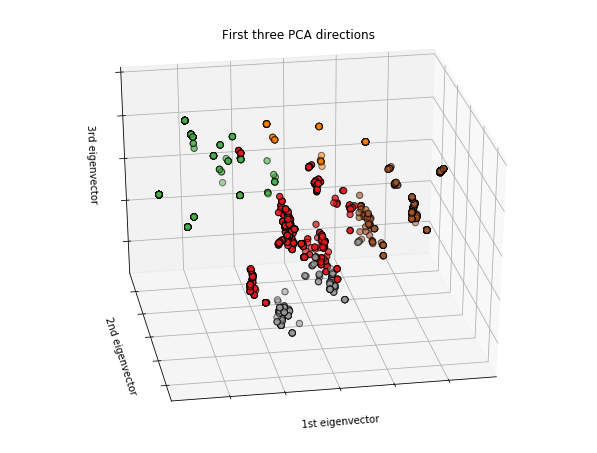

In [296]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=100)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_pred,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [292]:
y_pred

array([2, 1, 1, ..., 4, 4, 4])